In [1]:
import yfinance as yf
import talib
import numpy as np
import pandas as pd

In [2]:
# ============================================================================
# DOWNLOAD STOCK DATA FROM 2018 USING YFINANCE
# ============================================================================

# Configuration - Change these variables as needed
TICKER = 'QQQ'  # Any ticker symbol (e.g., 'AAPL', 'MSFT', 'GOOGL')
START_DATE = '2018-01-01'  # Any start date in YYYY-MM-DD format

# Download data from start date onwards
stock_data = yf.download(TICKER, start=START_DATE, interval='1d')

if not stock_data.empty:
    print(f"✅ Successfully downloaded {len(stock_data)} records for {TICKER} from {START_DATE}")
    print(f"Data range: {stock_data.index.min().date()} to {stock_data.index.max().date()}")
    print("\nFirst 5 rows:")
    print(stock_data.head())
else:
    print(f"❌ Failed to download {TICKER} data from yfinance")

# Display the downloaded data
stock_data

/var/folders/tc/1rlgym492m70rw7ddhrpc1_80000gn/T/ipykernel_94668/2431403345.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(TICKER, start=START_DATE, interval='1d')
[*********************100%***********************]  1 of 1 completed

✅ Successfully downloaded 1946 records for QQQ from 2018-01-01
Data range: 2018-01-02 to 2025-09-29

First 5 rows:
Price            Close        High         Low        Open    Volume
Ticker             QQQ         QQQ         QQQ         QQQ       QQQ
Date                                                                
2018-01-02  150.605362  150.643366  148.400772  148.771369  32573300
2018-01-03  152.068726  152.201760  150.719370  150.747877  29383600
2018-01-04  152.334824  152.790940  152.116270  152.591396  24776100
2018-01-05  153.864700  153.969229  152.771917  153.056995  26992300
2018-01-08  154.463364  154.539385  153.807688  153.864701  23159100


Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
2018-01-02,150.605362,150.643366,148.400772,148.771369,32573300
2018-01-03,152.068726,152.201760,150.719370,150.747877,29383600
2018-01-04,152.334824,152.790940,152.116270,152.591396,24776100
2018-01-05,153.864700,153.969229,152.771917,153.056995,26992300
2018-01-08,154.463364,154.539385,153.807688,153.864701,23159100
...,...,...,...,...,...
2025-09-23,598.200012,602.570007,596.979980,602.369995,64635500
2025-09-24,596.099976,599.900024,593.359985,599.580017,49850300


In [3]:
# ============================================================================
# TECHNICAL ANALYSIS INDICATORS USING TA-LIB
# ============================================================================

# Make sure stock_data is available from the previous cell
if "stock_data" not in locals():
    raise ValueError("Please run the stock data download cell first")

# Extract OHLCV data (handling multi-level columns from yfinance)
if isinstance(stock_data.columns, pd.MultiIndex):
    close = stock_data[("Close", TICKER)].values
    high = stock_data[("High", TICKER)].values
    low = stock_data[("Low", TICKER)].values
    open_ = stock_data[("Open", TICKER)].values
    volume = stock_data[("Volume", TICKER)].values
else:
    close = stock_data["Close"].values
    high = stock_data["High"].values
    low = stock_data["Low"].values
    open_ = stock_data["Open"].values
    volume = stock_data["Volume"].values

print(f"Calculating technical indicators for {TICKER}...")

# Simple Moving Averages
sma_20 = talib.SMA(close, timeperiod=20)
sma_50 = talib.SMA(close, timeperiod=50)

# Exponential Moving Averages
ema_12 = talib.EMA(close, timeperiod=12)
ema_26 = talib.EMA(close, timeperiod=26)

# MACD
macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

# RSI
rsi = talib.RSI(close, timeperiod=14)

# Stochastic RSI
stochrsi_k, stochrsi_d = talib.STOCHRSI(close, timeperiod=14, fastk_period=3, fastd_period=3, fastd_matype=0)

# VWAP (manual calculation)
typical_price = (high + low + close) / 3
price_volume = typical_price * volume
cumulative_price_volume = np.cumsum(price_volume)
cumulative_volume = np.cumsum(volume)
vwap = cumulative_price_volume / cumulative_volume

# Schaff Trend Cycle
cycle_period = 10
macd_cycle = talib.EMA(macd, timeperiod=cycle_period)
macd_smooth = talib.EMA(macd_cycle, timeperiod=cycle_period)
highest_macd = talib.MAX(macd_smooth, timeperiod=cycle_period)
lowest_macd = talib.MIN(macd_smooth, timeperiod=cycle_period)
stc_k = 100 * ((macd_smooth - lowest_macd) / (highest_macd - lowest_macd))
stc_d = talib.SMA(stc_k, timeperiod=3)

# Create indicators dataframe
indicators_df = pd.DataFrame({
    "Date": stock_data.index,
    "Close": close,
    "SMA_20": sma_20,
    "SMA_50": sma_50,
    "EMA_12": ema_12,
    "EMA_26": ema_26,
    "MACD": macd,
    "MACD_Signal": macdsignal,
    "MACD_Hist": macdhist,
    "RSI": rsi,
    "StochRSI_K": stochrsi_k,
    "StochRSI_D": stochrsi_d,
    "VWAP": vwap,
    "STC_K": stc_k,
    "STC_D": stc_d
})

print("✅ All technical indicators calculated!")
print(f"Data shape: {indicators_df.shape}")
indicators_df.tail(5)

Calculating technical indicators for QQQ...
✅ All technical indicators calculated!
Data shape: (1946, 15)


,Date,Close,SMA_20,SMA_50,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Hist,RSI,StochRSI_K,StochRSI_D,VWAP,STC_K,STC_D
1941,2025-09-23,598.200012,582.359964,573.025739,590.400045,582.394497,8.005548,6.333167,1.672381,69.142027,0.000000,6.666667e+01,310.751402,100.0,100.0
1942,2025-09-24,596.099976,583.567615,573.826232,591.276957,583.409718,7.867239,6.639981,1.227258,65.886708,0.000000,3.333333e+01,310.909440,100.0,100.0
1943,2025-09-25,593.530029,584.602820,574.563939,591.623584,584.159371,7.464213,6.804827,0.659386,62.037364,0.000000,3.315866e-14,311.130772,100.0,100.0
1944,2025-09-26,595.969971,585.580728,575.260349,592.292259,585.034230,7.258029,6.895468,0.362561,64.177237,55.590593,1.853020e+01,311.301298,100.0,100.0
1945,2025-09-29,599.469971,587.067249,576.037546,593.396522,586.103544,7.292978,6.974970,0.318008,67.046720,100.000000,5.186353e+01,311.360742,100.0,100.0


In [4]:
# STEP 1: PREPARE PRICE SERIES

import pandas as pd
import numpy as np
import vectorbt as vbt
import warnings

warnings.filterwarnings("ignore", message="Degrees of freedom <= 0 for slice", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

# Expect stock_data and TICKER already exist
def select_close_series(df, ticker):
    if isinstance(df.columns, pd.MultiIndex):
        if ('Close', ticker) in df.columns:
            s = df[('Close', ticker)]
        else:
            cols = [c for c in df.columns if 'Close' in str(c)]
            if not cols:
                raise KeyError("Close not found")
            s = df[cols[0]]
    else:
        s = df['Close']
    return s.astype(float).squeeze()

close = select_close_series(stock_data, TICKER)
close.name = 'price'

# Simple split
TRAIN_RATIO = 0.7
split_idx = int(len(close) * TRAIN_RATIO)
train_close = close.iloc[:split_idx].copy()
val_close   = close.iloc[split_idx:].copy()

print(f"✅ Data ready: train={train_close.index[0].date()} → {train_close.index[-1].date()} | val={val_close.index[0].date()} → {val_close.index[-1].date()}")

✅ Data ready: train=2018-01-02 → 2023-05-31 | val=2023-06-01 → 2025-09-29


# 🚀 MOVING AVERAGE CROSSOVER GRID SEARCH - TRAINING SET

This section performs a comprehensive grid search optimization for the **SMA Crossover Strategy** using only the **training data**.

The goal is to find the optimal fast/slow SMA combination that maximizes the Sharpe ratio on unseen data.

---

In [5]:
# STEP 2: DEFINE MA COMBINATIONS

fast_periods = [5, 10, 15, 20, 25, 30]
slow_periods = [30, 40, 50, 60, 80, 100]
ma_combinations = [(f, s) for f in fast_periods for s in slow_periods if f < s]

print(f"📦 MA combinations: {len(ma_combinations)}")

📦 MA combinations: 35


In [6]:
# STEP 3: VISUALIZE SIGNALS FOR ONE EXAMPLE

example_fast, example_slow = 5, 30
fast_ma = vbt.MA.run(train_close, example_fast, ewm=False).ma
slow_ma = vbt.MA.run(train_close, example_slow, ewm=False).ma

entries = fast_ma.vbt.crossed_above(slow_ma).reindex(train_close.index).fillna(False)
exits   = fast_ma.vbt.crossed_below(slow_ma).reindex(train_close.index).fillna(False)

signals_df = pd.DataFrame({
    'Close': train_close.values,
    'Fast_MA': fast_ma.values,
    'Slow_MA': slow_ma.values,
    'Buy': entries.values.astype(bool),
    'Sell': exits.values.astype(bool)
}, index=train_close.index)
signals_df.index.name = 'Date'

pos = 0
pos_list = []
for buy, sell in zip(signals_df['Buy'], signals_df['Sell']):
    if buy: pos = 1
    elif sell: pos = 0
    pos_list.append(pos)
signals_df['Position'] = pos_list

print(f"📈 Example SMA({example_fast},{example_slow}) signals:")
print(signals_df.head(20).to_string())

📈 Example SMA(5,30) signals:
                 Close     Fast_MA  Slow_MA    Buy   Sell  Position
Date                                                               
2018-01-02  150.605362         NaN      NaN  False  False         0
2018-01-03  152.068726         NaN      NaN  False  False         0
2018-01-04  152.334824         NaN      NaN  False  False         0
2018-01-05  153.864700         NaN      NaN  False  False         0
2018-01-08  154.463364  152.667395      NaN  False  False         0
2018-01-09  154.472870  153.440897      NaN  False  False         0
2018-01-10  154.111740  153.849500      NaN  False  False         0
2018-01-11  155.166534  154.415842      NaN  False  False         0
2018-01-12  156.306824  154.904266      NaN  False  False         0
2018-01-16  155.860214  155.183636      NaN  False  False         0
2018-01-17  157.542191  155.797501      NaN  False  False         0
2018-01-18  157.570724  156.489297      NaN  False  False         0
2018-01-19  158.064

In [7]:
# add more indicators and entries, fix it in 1 notebook, i think its easier to then just copy paste after

In [8]:
# STEP 4: GRID SEARCH WITH SIMPLE METRICS (FIXED TRADE CALCULATIONS)

import numpy as np
import pandas as pd
import vectorbt as vbt
import warnings

FREQ = "1D"
warnings.filterwarnings("ignore", message="Degrees of freedom <= 0 for slice", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

def series_to_np_bool(s: pd.Series, index: pd.Index) -> np.ndarray:
    return s.reindex(index).fillna(False).astype(bool).to_numpy(dtype=bool)

def safe_float(x, default=np.nan):
    try:
        return float(x) if x is not None and not pd.isna(x) else default
    except Exception:
        return default

def compute_trades_per_year(index: pd.Index, total_trades: int) -> float:
    if total_trades == 0 or len(index) == 0:
        return 0.0
    years = (index[-1] - index[0]).days / 365.25
    return float(total_trades / years) if years > 0 else np.nan

price_np = train_close.to_numpy(dtype=float)
results = []

for f, s in ma_combinations:
    fma = vbt.MA.run(train_close, f, ewm=False).ma
    sma = vbt.MA.run(train_close, s, ewm=False).ma

    entries = series_to_np_bool(fma.vbt.crossed_above(sma), train_close.index)
    exits   = series_to_np_bool(fma.vbt.crossed_below(sma), train_close.index)

    pf = vbt.Portfolio.from_signals(
        close=price_np,
        entries=entries,
        exits=exits,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    # Portfolio metrics (these work fine)
    total_return = safe_float(pf.total_return())
    annualized_return = safe_float(pf.annualized_return(freq=FREQ))
    max_drawdown = safe_float(pf.max_drawdown())
    volatility = safe_float(pf.annualized_volatility(freq=FREQ))
    sharpe = safe_float(pf.sharpe_ratio(freq=FREQ))
    sortino = safe_float(pf.sortino_ratio(freq=FREQ))
    
    # Trade metrics (fixed approach)
    trades = pf.trades
    total_trades = len(trades)
    
    if total_trades > 0:
        # Get trade returns as numpy array
        if hasattr(trades, 'returns'):
            if hasattr(trades.returns, 'values'):
                trade_returns = trades.returns.values
            else:
                trade_returns = np.array(trades.returns)
        else:
            trade_returns = np.array([])
        
        if len(trade_returns) > 0:
            # Calculate metrics from trade returns
            winning_trades = trade_returns[trade_returns > 0]
            losing_trades = trade_returns[trade_returns < 0]
            
            win_rate_pct = (len(winning_trades) / len(trade_returns)) * 100
            
            # Profit factor = total gains / abs(total losses)
            total_gains = winning_trades.sum() if len(winning_trades) > 0 else 0
            total_losses = abs(losing_trades.sum()) if len(losing_trades) > 0 else 0
            profit_factor = total_gains / total_losses if total_losses > 0 else np.inf
            
            # Expectancy = average trade return
            expectancy = trade_returns.mean()
            
            # Average win/loss amounts
            avg_win_amount = winning_trades.mean() if len(winning_trades) > 0 else 0.0
            avg_loss_amount = abs(losing_trades.mean()) if len(losing_trades) > 0 else 0.0
        else:
            win_rate_pct = np.nan
            profit_factor = np.nan
            expectancy = 0.0
            avg_win_amount = 0.0
            avg_loss_amount = 0.0
    else:
        win_rate_pct = np.nan
        profit_factor = np.nan
        expectancy = 0.0
        avg_win_amount = 0.0
        avg_loss_amount = 0.0

    metrics = {
        'fast': f, 'slow': s,
        'total_return': total_return,
        'annualized_return': annualized_return,
        'max_drawdown': max_drawdown,
        'volatility': volatility,
        'sharpe': sharpe,
        'sortino': sortino,
        'total_trades': total_trades,
        'win_rate_pct': win_rate_pct,
        'profit_factor': profit_factor,
        'expectancy': expectancy,
        'avg_win_amount': avg_win_amount,
        'avg_loss_amount': avg_loss_amount,
        'trades_per_year': compute_trades_per_year(train_close.index, total_trades)
    }

    results.append(metrics)

results_df = pd.DataFrame(results).sort_values('sharpe', ascending=False)
print("🏁 Grid Search (top 10 by Sharpe):")
print(results_df.head(10).to_string(index=False))

🏁 Grid Search (top 10 by Sharpe):
 fast  slow  total_return  annualized_return  max_drawdown  volatility   sharpe  sortino  total_trades  win_rate_pct  profit_factor  expectancy  avg_win_amount  avg_loss_amount  trades_per_year
    5   100      0.952308           0.196365     -0.224191    0.189609 1.040959 1.443320            11     63.636364       7.017359    0.073001        0.133781         0.033362         2.034304
   10   100      0.912148           0.189719     -0.184812    0.189762 1.010893 1.402292             9     66.666667       6.984574    0.087927        0.153928         0.044077         1.664430
    5    50      0.829455           0.175707     -0.196303    0.181517 0.982959 1.370946            18     44.444444       3.038318    0.038407        0.128811         0.033917         3.328861
   10    30      0.829628           0.175737     -0.242559    0.186364 0.962344 1.336898            21     57.142857       2.645208    0.033580        0.094484         0.047625         3.883

In [9]:
# BENCHMARK ANALYSIS: Best Strategy vs Market (Buy & Hold) - ENHANCED

import numpy as np
import pandas as pd
import vectorbt as vbt

if results_df.empty:
    print("❌ No results for benchmark analysis.")
else:
    # Get best strategy stats (already computed)
    best = results_df.iloc[0]
    bf, bs = int(best['fast']), int(best['slow'])
    
    print(f"📊 BENCHMARK ANALYSIS: SMA({bf},{bs}) vs Buy & Hold")
    print("=" * 60)
    
    # Create simple buy & hold benchmark
    benchmark_entries = np.zeros(len(train_close), dtype=bool)
    benchmark_entries[0] = True  # Buy on first day
    benchmark_exits = np.zeros(len(train_close), dtype=bool)  # Never sell
    
    benchmark_pf = vbt.Portfolio.from_signals(
        close=train_close.to_numpy(dtype=float),
        entries=benchmark_entries,
        exits=benchmark_exits,
        init_cash=100_000,
        fees=0.0005,
        freq=FREQ
    )
    
    # Benchmark metrics
    bench_total_return = benchmark_pf.total_return()
    bench_annualized_return = benchmark_pf.annualized_return(freq=FREQ)
    bench_sharpe = benchmark_pf.sharpe_ratio(freq=FREQ)
    bench_sortino = benchmark_pf.sortino_ratio(freq=FREQ)
    bench_max_drawdown = benchmark_pf.max_drawdown()
    bench_volatility = benchmark_pf.annualized_volatility(freq=FREQ)
    
    # Calculate beta (strategy volatility vs market volatility as proxy)
    # Simple beta approximation: strategy_vol / market_vol
    market_beta = best['volatility'] / bench_volatility if bench_volatility != 0 else np.nan
    
    # Performance comparison using existing stats
    print("PERFORMANCE COMPARISON:")
    print(f"Strategy (SMA {bf},{bs}):")
    print(f"  Total Return:      {best['total_return']:.2%}")
    print(f"  Annualized Return: {best['annualized_return']:.2%}")
    print(f"  Sharpe Ratio:      {best['sharpe']:.3f}")
    print(f"  Sortino Ratio:     {best['sortino']:.3f}")
    print(f"  Max Drawdown:      {best['max_drawdown']:.2%}")
    print(f"  Volatility:        {best['volatility']:.2%}")
    print(f"  Total Trades:      {best['total_trades']}")
    print(f"  Win Rate:          {best['win_rate_pct']:.1f}%")
    print(f"  Profit Factor:     {best['profit_factor']:.2f}")
    
    print(f"\nBenchmark (Buy & Hold {TICKER}):")
    print(f"  Total Return:      {bench_total_return:.2%}")
    print(f"  Annualized Return: {bench_annualized_return:.2%}")
    print(f"  Sharpe Ratio:      {bench_sharpe:.3f}")
    print(f"  Sortino Ratio:     {bench_sortino:.3f}")
    print(f"  Max Drawdown:      {bench_max_drawdown:.2%}")
    print(f"  Volatility:        {bench_volatility:.2%}")
    
    # Enhanced outperformance metrics
    excess_return = best['total_return'] - bench_total_return
    excess_annualized_return = best['annualized_return'] - bench_annualized_return
    sharpe_diff = best['sharpe'] - bench_sharpe
    sortino_diff = best['sortino'] - bench_sortino
    excess_max_drawdown = best['max_drawdown'] - bench_max_drawdown  # Negative is better
    
    print(f"\nOUTPERFORMANCE METRICS:")
    print(f"  Excess Return:           {excess_return:.2%}")
    print(f"  Excess Annualized Return: {excess_annualized_return:.2%}")
    print(f"  Sharpe Difference:       {sharpe_diff:.3f}")
    print(f"  Sortino Difference:      {sortino_diff:.3f}")
    print(f"  Excess Max Drawdown:     {excess_max_drawdown:.2%} ({'Better' if excess_max_drawdown > 0 else '❌ Worse'})")
    print(f"  Market Beta (approx):    {market_beta:.3f} ({'Lower risk' if market_beta < 1 else 'Higher risk'})")
    


📊 BENCHMARK ANALYSIS: SMA(5,100) vs Buy & Hold
PERFORMANCE COMPARISON:
Strategy (SMA 5,100):
  Total Return:      95.23%
  Annualized Return: 19.64%
  Sharpe Ratio:      1.041
  Sortino Ratio:     1.443
  Max Drawdown:      -22.42%
  Volatility:        18.96%
  Total Trades:      11.0
  Win Rate:          63.6%
  Profit Factor:     7.02

Benchmark (Buy & Hold QQQ):
  Total Return:      127.50%
  Annualized Return: 24.64%
  Sharpe Ratio:      0.866
  Sortino Ratio:     1.216
  Max Drawdown:      -35.12%
  Volatility:        31.04%

OUTPERFORMANCE METRICS:
  Excess Return:           -32.27%
  Excess Annualized Return: -5.01%
  Sharpe Difference:       0.175
  Sortino Difference:      0.227
  Excess Max Drawdown:     12.70% (Better)
  Market Beta (approx):    0.611 (Lower risk)


In [10]:
# STEP 5: VALIDATE BEST COMBO - IN-SAMPLE vs OUT-OF-SAMPLE COMPARISON

import numpy as np
import pandas as pd
import vectorbt as vbt

if 'FREQ' not in globals():
    FREQ = "1D"

if results_df.empty:
    print("No results to validate.")
else:
    best = results_df.iloc[0]
    bf, bs = int(best['fast']), int(best['slow'])

    # Out-of-sample validation
    fma_val = vbt.MA.run(val_close, bf, ewm=False).ma
    sma_val = vbt.MA.run(val_close, bs, ewm=False).ma
    e_val = fma_val.vbt.crossed_above(sma_val).reindex(val_close.index).fillna(False).to_numpy(dtype=bool)
    x_val = fma_val.vbt.crossed_below(sma_val).reindex(val_close.index).fillna(False).to_numpy(dtype=bool)

    pf_val = vbt.Portfolio.from_signals(
        close=val_close.to_numpy(dtype=float),
        entries=e_val, exits=x_val,
        init_cash=100_000, fees=0.0005, slippage=0.0005, freq=FREQ
    )

    # Out-of-sample metrics
    val_total_return = pf_val.total_return()
    val_annualized_return = pf_val.annualized_return(freq=FREQ)
    val_sharpe = pf_val.sharpe_ratio(freq=FREQ)
    val_sortino = pf_val.sortino_ratio(freq=FREQ)
    val_max_drawdown = pf_val.max_drawdown()
    val_volatility = pf_val.annualized_volatility(freq=FREQ)

    trades = pf_val.trades
    val_total_trades = len(trades)
    years = max((val_close.index[-1] - val_close.index[0]).days / 365.25, 1e-9)
    val_trades_per_year = val_total_trades / years

    val_win_rate_pct = np.nan
    val_profit_factor = np.nan
    val_expectancy = 0.0
    if val_total_trades > 0:
        tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
        if tr.size > 0:
            pos = tr[tr > 0]; neg = tr[tr < 0]
            val_win_rate_pct = (len(pos) / len(tr)) * 100 if len(tr) > 0 else np.nan
            gains = pos.sum() if len(pos) else 0.0
            losses = abs(neg.sum()) if len(neg) else 0.0
            val_profit_factor = gains / losses if losses > 0 else np.inf
            val_expectancy = tr.mean()

    def chg(before, after):
        if pd.isna(before) or pd.isna(after) or before == 0:
            return "N/A"
        return f"{((after - before) / abs(before)) * 100:+.1f}%"

    # Display
    print(f"IN-SAMPLE vs OUT-OF-SAMPLE COMPARISON: SMA({bf},{bs})")
    print("=" * 80)
    print(f"{'METRIC':<25} {'IN-SAMPLE':<15} {'OUT-OF-SAMPLE':<15} {'DEGRADATION':<15}")
    print("-" * 80)

    print("RETURN METRICS:")
    print(f"{'Total Return':<25} {best['total_return']:<15.2%} {val_total_return:<15.2%} {chg(best['total_return'], val_total_return)}")
    print(f"{'Annualized Return':<25} {best['annualized_return']:<15.2%} {val_annualized_return:<15.2%} {chg(best['annualized_return'], val_annualized_return)}")

    print("\nRISK-ADJUSTED METRICS:")
    print(f"{'Sharpe Ratio':<25} {best['sharpe']:<15.3f} {val_sharpe:<15.3f} {chg(best['sharpe'], val_sharpe)}")
    print(f"{'Sortino Ratio':<25} {best['sortino']:<15.3f} {val_sortino:<15.3f} {chg(best['sortino'], val_sortino)}")

    print("\nRISK METRICS:")
    print(f"{'Max Drawdown':<25} {best['max_drawdown']:<15.2%} {val_max_drawdown:<15.2%} {chg(best['max_drawdown'], val_max_drawdown)}")
    print(f"{'Volatility':<25} {best['volatility']:<15.2%} {val_volatility:<15.2%} {chg(best['volatility'], val_volatility)}")

    print("\nTRADE METRICS:")
    print(f"{'Total Trades':<25} {best['total_trades']:<15.0f} {val_total_trades:<15.0f} {chg(best['total_trades'], val_total_trades)}")
    print(f"{'Trades per Year':<25} {best['trades_per_year']:<15.1f} {val_trades_per_year:<15.1f} {chg(best['trades_per_year'], val_trades_per_year)}")
    print(f"{'Win Rate %':<25} {best['win_rate_pct']:<15.1f} {val_win_rate_pct:<15.1f} {chg(best['win_rate_pct'], val_win_rate_pct)}")
    print(f"{'Profit Factor':<25} {best['profit_factor']:<15.2f} {val_profit_factor:<15.2f} {chg(best['profit_factor'], val_profit_factor)}")
    print(f"{'Expectancy':<25} {best['expectancy']:<15.4f} {val_expectancy:<15.4f} {chg(best['expectancy'], val_expectancy)}")

IN-SAMPLE vs OUT-OF-SAMPLE COMPARISON: SMA(5,100)
METRIC                    IN-SAMPLE       OUT-OF-SAMPLE   DEGRADATION    
--------------------------------------------------------------------------------
RETURN METRICS:
Total Return              95.23%          37.33%          -60.8%
Annualized Return         19.64%          21.93%          +11.7%

RISK-ADJUSTED METRICS:
Sharpe Ratio              1.041           1.298           +24.7%
Sortino Ratio             1.443           1.828           +26.6%

RISK METRICS:
Max Drawdown              -22.42%         -18.30%         +18.4%
Volatility                18.96%          16.30%          -14.0%

TRADE METRICS:
Total Trades              11              5               -54.5%
Trades per Year           2.0             2.1             +5.5%
Win Rate %                63.6            80.0            +25.7%
Profit Factor             7.02            8.77            +25.0%
Expectancy                0.0730          0.0684          -6.3%


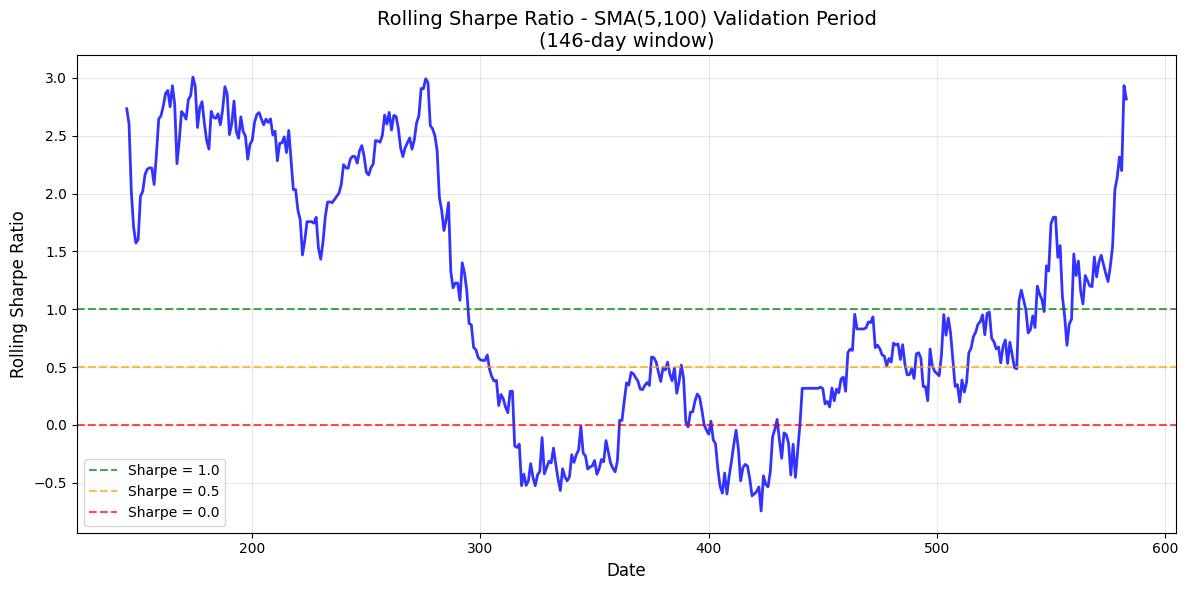

📊 Rolling Sharpe Statistics (146-day window):
  Current Sharpe:      2.817
  Average Sharpe:      1.046
  Best Sharpe:         3.007
  Worst Sharpe:        -0.745
  Sharpe Volatility:   1.080


In [11]:
# ROLLING SHARPE RATIO VISUALIZATION

import matplotlib.pyplot as plt
import pandas as pd

if 'pf_val' in locals():
    # Calculate rolling Sharpe (252-day window for daily data)
    returns_val = pf_val.returns()
    rolling_window = min(252, len(returns_val) // 4)  # 1 year or 1/4 of data, whichever is smaller
    
    if len(returns_val) > rolling_window:
        rolling_sharpe = returns_val.rolling(window=rolling_window).apply(
            lambda x: (x.mean() * 252) / (x.std() * np.sqrt(252)) if x.std() != 0 else np.nan
        )
        
        plt.figure(figsize=(12, 6))
        plt.plot(rolling_sharpe.index, rolling_sharpe.values, linewidth=2, color='blue', alpha=0.8)
        plt.axhline(y=1.0, color='green', linestyle='--', alpha=0.7, label='Sharpe = 1.0')
        plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Sharpe = 0.5')
        plt.axhline(y=0.0, color='red', linestyle='--', alpha=0.7, label='Sharpe = 0.0')
        
        plt.title(f'Rolling Sharpe Ratio - SMA({bf},{bs}) Validation Period\n({rolling_window}-day window)', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Rolling Sharpe Ratio', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        print(f"📊 Rolling Sharpe Statistics ({rolling_window}-day window):")
        print(f"  Current Sharpe:      {rolling_sharpe.iloc[-1]:.3f}")
        print(f"  Average Sharpe:      {rolling_sharpe.mean():.3f}")
        print(f"  Best Sharpe:         {rolling_sharpe.max():.3f}")
        print(f"  Worst Sharpe:        {rolling_sharpe.min():.3f}")
        print(f"  Sharpe Volatility:   {rolling_sharpe.std():.3f}")
    else:
        print("⚠️ Not enough data for rolling Sharpe calculation")
else:
    print("❌ No validation portfolio found. Run STEP 5 first.")

In [12]:
# STEP 5B: FULL-SAMPLE METRICS + SIGNALS VISUAL (uses best SMA from results)

import numpy as np
import pandas as pd
import vectorbt as vbt
import matplotlib.pyplot as plt

if results_df.empty:
    print("No results to analyze.")
else:
    best = results_df.iloc[0]
    bf, bs = int(best['fast']), int(best['slow'])

    # Build full-sample signals once from existing price series
    fast_full = vbt.MA.run(close, bf, ewm=False).ma
    slow_full = vbt.MA.run(close, bs, ewm=False).ma

    entries_full = fast_full.vbt.crossed_above(slow_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
    exits_full   = fast_full.vbt.crossed_below(slow_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)

    price_full = close.to_numpy(dtype=float)

    # Full-sample portfolio
    pf_full = vbt.Portfolio.from_signals(
        close=price_full,
        entries=entries_full,
        exits=exits_full,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    # Train/Val split using same split_idx defined earlier
    price_train = train_close.to_numpy(dtype=float)
    price_val   = val_close.to_numpy(dtype=float)

    entries_train = entries_full[:split_idx]
    exits_train   = exits_full[:split_idx]
    entries_val   = entries_full[split_idx:]
    exits_val     = exits_full[split_idx:]

    pf_train = vbt.Portfolio.from_signals(
        close=price_train,
        entries=entries_train,
        exits=exits_train,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    pf_val2 = vbt.Portfolio.from_signals(
        close=price_val,
        entries=entries_val,
        exits=exits_val,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    def trade_metrics(pf, idx: pd.Index):
        trades = pf.trades
        total_trades = len(trades)
        if len(idx) >= 2 and hasattr(idx[0], 'to_pydatetime'):
            years = (idx[-1] - idx[0]).days / 365.25
        else:
            # Fallback: assume daily bars
            years = len(idx) / 252.0
        years = years if years > 0 else 1e-9

        trades_per_year = total_trades / years
        win_rate_pct = np.nan
        profit_factor = np.nan
        expectancy = 0.0

        if total_trades > 0:
            tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
            if tr.size > 0:
                pos = tr[tr > 0]
                neg = tr[tr < 0]
                win_rate_pct = (len(pos) / len(tr)) * 100 if len(tr) > 0 else np.nan
                gains = pos.sum() if len(pos) else 0.0
                losses = abs(neg.sum()) if len(neg) else 0.0
                profit_factor = gains / losses if losses > 0 else np.inf
                expectancy = float(tr.mean())

        return total_trades, trades_per_year, win_rate_pct, profit_factor, expectancy

    def metrics_dict(pf, idx: pd.Index):
        total_trades, trades_per_year, win_rate_pct, profit_factor, expectancy = trade_metrics(pf, idx)
        return {
            'total_return': float(pf.total_return()),
            'annualized_return': float(pf.annualized_return(freq=FREQ)),
            'sharpe': float(pf.sharpe_ratio(freq=FREQ)),
            'sortino': float(pf.sortino_ratio(freq=FREQ)),
            'max_drawdown': float(pf.max_drawdown()),
            'volatility': float(pf.annualized_volatility(freq=FREQ)),
            'total_trades': total_trades,
            'trades_per_year': trades_per_year,
            'win_rate_pct': win_rate_pct,
            'profit_factor': profit_factor,
            'expectancy': expectancy,
        }

    m_train = metrics_dict(pf_train, train_close.index)
    m_val   = metrics_dict(pf_val2,   val_close.index)
    m_full  = metrics_dict(pf_full,   close.index)

    def chg(b, a):
        if pd.isna(b) or pd.isna(a) or b == 0:
            return "N/A"
        return f"{((a - b) / abs(b)) * 100:+.1f}%"

    # Print comparison table
    print(f"SMA({bf},{bs}) - Metrics")
    print("=" * 80)
    print(f"{'METRIC':<25} {'IN-SAMPLE':<15} {'OUT-OF-SAMPLE':<15} {'FULL-SAMPLE':<15} {'DEGRADATION':<15}")
    print("-" * 80)

    print("RETURN METRICS:")
    print(f"{'Total Return':<25} {m_train['total_return']:<15.2%} {m_val['total_return']:<15.2%} {m_full['total_return']:<15.2%} {chg(m_train['total_return'], m_val['total_return'])}")
    print(f"{'Annualized Return':<25} {m_train['annualized_return']:<15.2%} {m_val['annualized_return']:<15.2%} {m_full['annualized_return']:<15.2%} {chg(m_train['annualized_return'], m_val['annualized_return'])}")

    print("\nRISK-ADJUSTED METRICS:")
    print(f"{'Sharpe Ratio':<25} {m_train['sharpe']:<15.3f} {m_val['sharpe']:<15.3f} {m_full['sharpe']:<15.3f} {chg(m_train['sharpe'], m_val['sharpe'])}")
    print(f"{'Sortino Ratio':<25} {m_train['sortino']:<15.3f} {m_val['sortino']:<15.3f} {m_full['sortino']:<15.3f} {chg(m_train['sortino'], m_val['sortino'])}")

    print("\nRISK METRICS:")
    print(f"{'Max Drawdown':<25} {m_train['max_drawdown']:<15.2%} {m_val['max_drawdown']:<15.2%} {m_full['max_drawdown']:<15.2%} {chg(m_train['max_drawdown'], m_val['max_drawdown'])}")
    print(f"{'Volatility':<25} {m_train['volatility']:<15.2%} {m_val['volatility']:<15.2%} {m_full['volatility']:<15.2%} {chg(m_train['volatility'], m_val['volatility'])}")

    print

SMA(5,100) - Metrics
METRIC                    IN-SAMPLE       OUT-OF-SAMPLE   FULL-SAMPLE     DEGRADATION    
--------------------------------------------------------------------------------
RETURN METRICS:
Total Return              95.23%          32.90%          164.58%         -65.5%
Annualized Return         19.64%          19.45%          20.02%          -0.9%

RISK-ADJUSTED METRICS:
Sharpe Ratio              1.041           1.165           1.072           +11.9%
Sortino Ratio             1.443           1.635           1.491           +13.3%

RISK METRICS:
Max Drawdown              -22.42%         -18.30%         -22.42%         +18.4%
Volatility                18.96%          16.42%          18.66%          -13.4%


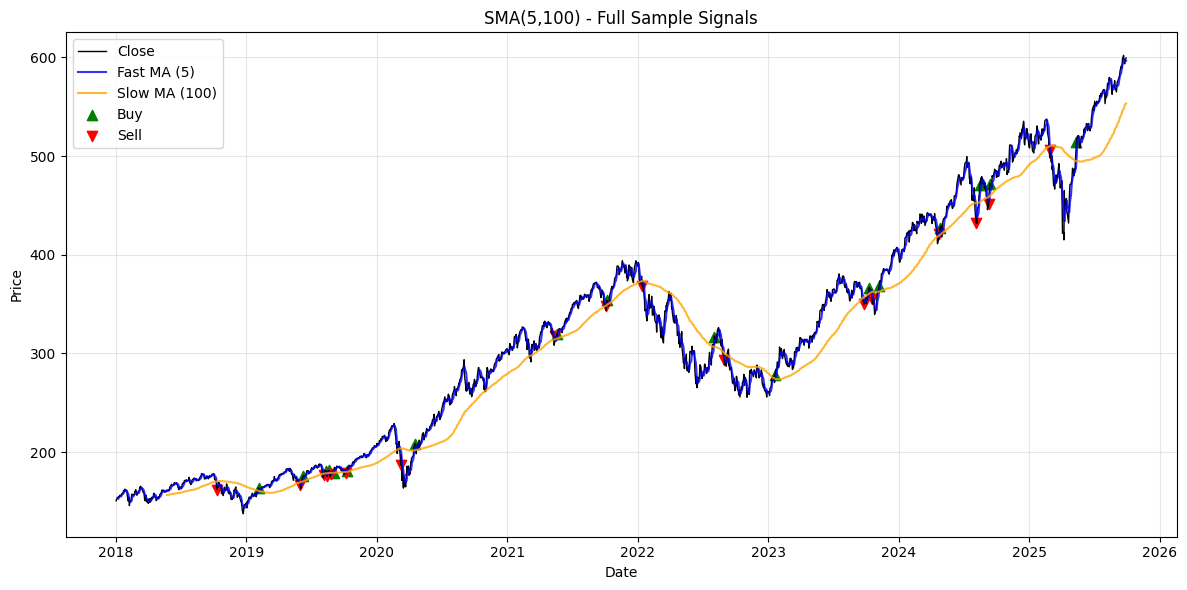

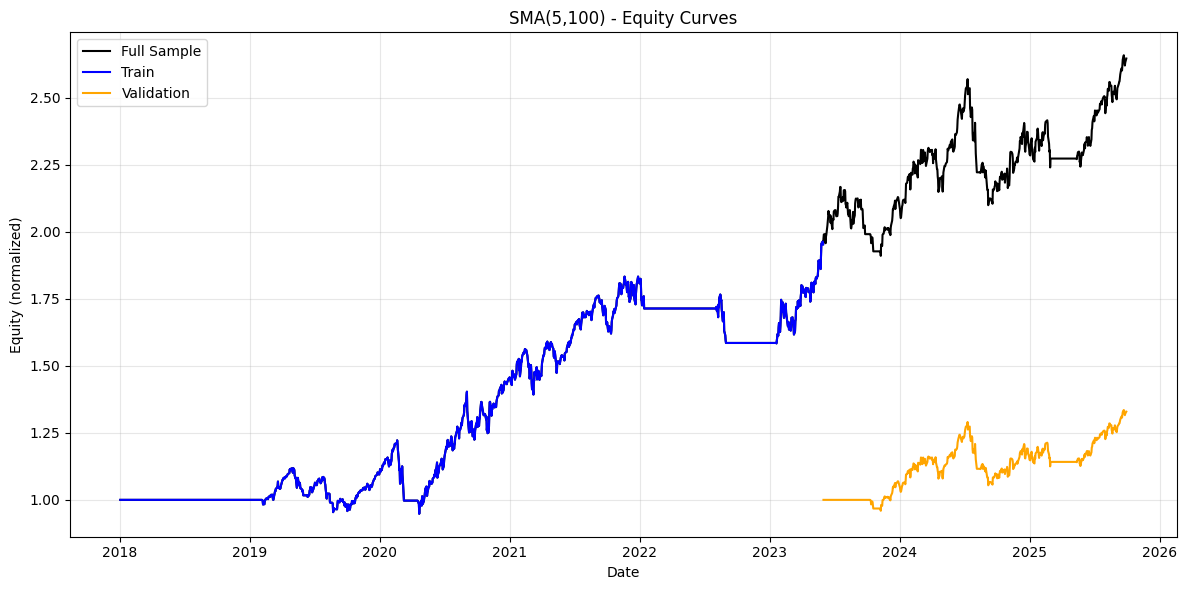

In [13]:
# STEP 5C: VISUALS ONLY (Signals + Equity Curves)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vectorbt as vbt

if results_df.empty:
    print("No results to visualize.")
else:
    best = results_df.iloc[0]
    bf, bs = int(best['fast']), int(best['slow'])

    # Use objects from previous cell if available; otherwise derive minimally
    need_build = False
    for name in ['fast_full', 'slow_full', 'entries_full', 'exits_full']:
        if name not in locals():
            need_build = True
            break

    if need_build:
        fast_full = vbt.MA.run(close, bf, ewm=False).ma
        slow_full = vbt.MA.run(close, bs, ewm=False).ma
        entries_full = fast_full.vbt.crossed_above(slow_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
        exits_full   = fast_full.vbt.crossed_below(slow_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)

    # 1) Price + MAs + signals (full sample)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(close.index, close.values, label='Close', color='black', linewidth=1)
    ax.plot(close.index, fast_full.values, label=f'Fast MA ({bf})', color='blue', alpha=0.8)
    ax.plot(close.index, slow_full.values, label=f'Slow MA ({bs})', color='orange', alpha=0.8)

    buy_idx = close.index[entries_full]
    sell_idx = close.index[exits_full]
    ax.scatter(buy_idx, close.reindex(buy_idx).values, marker='^', color='green', s=55, label='Buy')
    ax.scatter(sell_idx, close.reindex(sell_idx).values, marker='v', color='red', s=55, label='Sell')

    ax.set_title(f'SMA({bf},{bs}) - Full Sample Signals')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()

    # 2) Equity curves: train / val / full
    price_full = close.to_numpy(dtype=float)
    entries_train = entries_full[:split_idx]
    exits_train   = exits_full[:split_idx]
    entries_val   = entries_full[split_idx:]
    exits_val     = exits_full[split_idx:]

    pf_full = vbt.Portfolio.from_signals(
        close=price_full,
        entries=entries_full,
        exits=exits_full,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    pf_train = vbt.Portfolio.from_signals(
        close=train_close.to_numpy(dtype=float),
        entries=entries_train,
        exits=exits_train,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    pf_val2 = vbt.Portfolio.from_signals(
        close=val_close.to_numpy(dtype=float),
        entries=entries_val,
        exits=exits_val,
        init_cash=100_000,
        fees=0.0005,
        slippage=0.0005,
        freq=FREQ
    )

    eq_full = (1 + pf_full.returns()).cumprod()
    eq_train = (1 + pf_train.returns()).cumprod()
    eq_val = (1 + pf_val2.returns()).cumprod()

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(close.index, eq_full.values, label='Full Sample', color='black')
    ax.plot(train_close.index, eq_train.values, label='Train', color='blue')
    ax.plot(val_close.index, eq_val.values, label='Validation', color='orange')

    ax.set_title(f'SMA({bf},{bs}) - Equity Curves')
    ax.set_xlabel('Date')
    ax.set_ylabel('Equity (normalized)')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()



In [14]:
# 1. equity curve scheiden van, en per trade plotten zodat het meer op TV lijkt.

# 2. de signals van de buy en sell duidelijker maken, dit is een beetje een bende vind ik

In [15]:
# STEP 5E: PARAMETER SENSITIVITY TABLE (±15 lookbacks around current bf, bs)

import numpy as np
import pandas as pd
import vectorbt as vbt

if results_df.empty:
    print("No results available for sensitivity analysis.")
else:
    best = results_df.iloc[0]
    bf, bs = int(best['fast']), int(best['slow'])

    fast_candidates = list(range(max(2, bf - 15), bf + 16))
    slow_candidates = list(range(max(3, bs - 15), bs + 16))
    combos = [(f, s) for f in fast_candidates for s in slow_candidates if f < s]

    price_np = train_close.to_numpy(dtype=float)
    idx = train_close.index

    def series_to_np_bool(s: pd.Series) -> np.ndarray:
        return s.reindex(idx).fillna(False).astype(bool).to_numpy(dtype=bool)

    def eval_combo(f: int, s: int) -> dict:
        fma = vbt.MA.run(train_close, f, ewm=False).ma
        sma = vbt.MA.run(train_close, s, ewm=False).ma
        e = series_to_np_bool(fma.vbt.crossed_above(sma))
        x = series_to_np_bool(fma.vbt.crossed_below(sma))

        pf = vbt.Portfolio.from_signals(
            close=price_np, entries=e, exits=x,
            init_cash=100_000, fees=0.0005, slippage=0.0005, freq=FREQ
        )

        total_return = float(pf.total_return())
        sharpe = float(pf.sharpe_ratio(freq=FREQ))
        sortino = float(pf.sortino_ratio(freq=FREQ))
        mdd = float(pf.max_drawdown())
        vol = float(pf.annualized_volatility(freq=FREQ))

        trades = pf.trades
        ntr = len(trades)
        win_rate_pct = np.nan
        profit_factor = np.nan
        expectancy = 0.0
        if ntr > 0:
            tr = trades.returns.values if hasattr(trades.returns, 'values') else np.array(trades.returns)
            if tr.size > 0:
                pos = tr[tr > 0]
                neg = tr[tr < 0]
                win_rate_pct = (len(pos) / len(tr)) * 100 if len(tr) else np.nan
                gains = pos.sum() if len(pos) else 0.0
                losses = abs(neg.sum()) if len(neg) else 0.0
                profit_factor = gains / losses if losses > 0 else np.inf
                expectancy = float(tr.mean())

        return {
            'fast': f, 'slow': s,
            'sharpe': sharpe, 'sortino': sortino,
            'total_return': total_return, 'max_drawdown': mdd, 'volatility': vol,
            'total_trades': ntr, 'win_rate_pct': win_rate_pct,
            'profit_factor': profit_factor, 'expectancy': expectancy
        }

    rows = []
    for f, s in combos:
        try:
            rows.append(eval_combo(f, s))
        except Exception:
            pass

    if not rows:
        print("No sensitivity results computed.")
    else:
        sens = pd.DataFrame(rows)

        # Show as a table (sorted by fast, slow). Use display() in notebooks for nice HTML table.
        cols = ['fast','slow','sharpe','sortino','total_return','max_drawdown','volatility',
                'total_trades','win_rate_pct','profit_factor','expectancy']
        sens_table = sens[cols].sort_values(['fast','slow'])
        display(sens_table)

        # Compact variation summary (to see how much metrics change)
        metric_cols = ['sharpe','sortino','total_return','max_drawdown','volatility',
                       'win_rate_pct','profit_factor','expectancy']
        summary = sens_table[metric_cols].agg(['mean','std','min','max']).T
        print("\nSensitivity summary (mean / std / min / max):")
        print(summary.round(4).to_string())

,fast,slow,sharpe,sortino,total_return,max_drawdown,volatility,total_trades,win_rate_pct,profit_factor,expectancy
0,2,85,0.554655,0.742921,0.377795,-0.299900,0.186306,28,28.571429,1.742740,0.014710
1,2,86,0.540707,0.724224,0.366174,-0.299900,0.187235,28,32.142857,1.735595,0.014112
2,2,87,0.469483,0.627492,0.293601,-0.291874,0.182677,26,34.615385,1.659874,0.012947
3,2,88,0.583502,0.786782,0.400265,-0.272663,0.183683,26,34.615385,1.955066,0.015909
4,2,89,0.713393,0.968912,0.525735,-0.210067,0.182063,24,37.500000,2.402257,0.020752
...,...,...,...,...,...,...,...,...,...,...,...
584,20,111,0.806788,1.087525,0.761166,-0.285593,0.217694,5,60.000000,6.093473,0.145182
585,20,112,0.801896,1.081104,0.754199,-0.285593,0.217698,5,60.000000,6.057299,0.144151
586,20,113,0.813443,1.097165,0.770126,-0.285593,0.217546,4,75.000000,7.541659,0.181417
587,20,114,0.813443,1.097165,0.770126,-0.285593,0.217546,4,75.000000,7.541659,0.181417



Sensitivity summary (mean / std / min / max):
                  mean      std      min      max
sharpe          0.9437   0.1745   0.4695   1.3153
sortino         1.3010   0.2626   0.6275   1.8577
total_return    0.8647   0.2193   0.2936   1.4185
max_drawdown   -0.2255   0.0406  -0.3074  -0.1471
volatility      0.1965   0.0097   0.1802   0.2210
win_rate_pct   60.5066  11.9175  28.5714  87.5000
profit_factor   6.9810   3.7498   1.6599  21.2319
expectancy      0.1056   0.0562   0.0129   0.2802


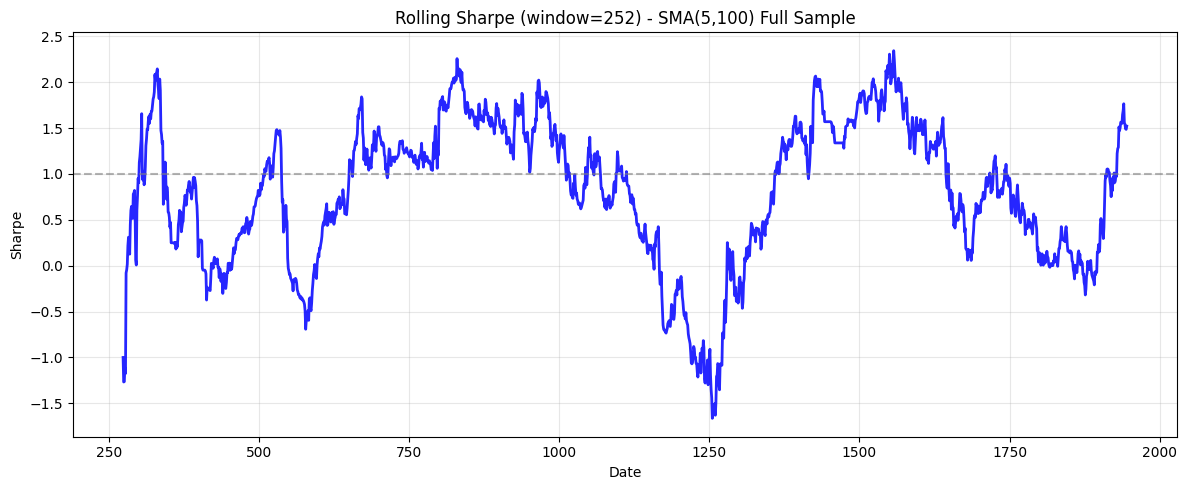

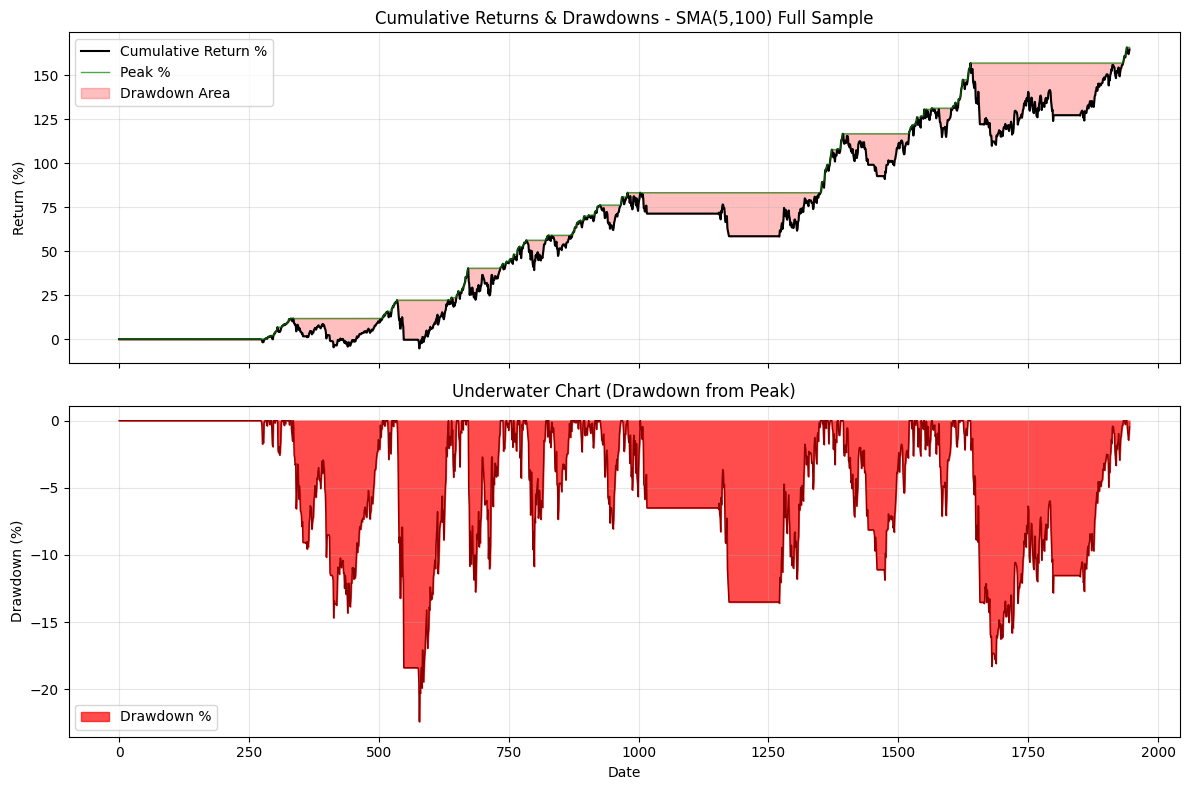

In [16]:
# STEP 5D: FULL-SAMPLE ROLLING SHARPE + DRAWDOWNS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vectorbt as vbt

if results_df.empty:
    print("No results to visualize.")
else:
    best = results_df.iloc[0]
    bf, bs = int(best['fast']), int(best['slow'])

    # Ensure full-sample signals/portfolio are available with minimal work
    need_build = False
    for name in ['entries_full', 'exits_full']:
        if name not in locals():
            need_build = True
            break

    if need_build:
        fast_full = vbt.MA.run(close, bf, ewm=False).ma
        slow_full = vbt.MA.run(close, bs, ewm=False).ma
        entries_full = fast_full.vbt.crossed_above(slow_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)
        exits_full   = fast_full.vbt.crossed_below(slow_full).reindex(close.index).fillna(False).to_numpy(dtype=bool)

    price_full = close.to_numpy(dtype=float)

    if 'pf_full' not in locals():
        pf_full = vbt.Portfolio.from_signals(
            close=price_full,
            entries=entries_full,
            exits=exits_full,
            init_cash=100_000,
            fees=0.0005,
            slippage=0.0005,
            freq=FREQ
        )

    # Compute returns
    ret = pf_full.returns()

    # 1) Rolling Sharpe (default daily data, 252-day window bounded by series length)
    rolling_window = max(20, min(252, max(1, len(ret) // 4)))
    if len(ret) > rolling_window:
        rolling_sharpe = ret.rolling(window=rolling_window).apply(
            lambda x: (x.mean() * 252) / (x.std() * np.sqrt(252)) if x.std() and x.std() != 0 else np.nan,
            raw=False
        )

        plt.figure(figsize=(12, 5))
        plt.plot(rolling_sharpe.index, rolling_sharpe.values, linewidth=2, color='blue', alpha=0.85)
        plt.axhline(y=1.0, color='gray', linestyle='--', alpha=0.6)
        plt.title(f'Rolling Sharpe (window={rolling_window}) - SMA({bf},{bs}) Full Sample')
        plt.xlabel('Date')
        plt.ylabel('Sharpe')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough data for rolling Sharpe calculation.")

    # 2) Drawdowns (underwater)
    eq = (1 + ret).cumprod()
    peak = eq.cummax()
    dd = (eq - peak) / peak

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    ax1.plot(eq.index, (eq - 1) * 100, color='black', linewidth=1.5, label='Cumulative Return %')
    ax1.plot(peak.index, (peak - 1) * 100, color='green', linewidth=1.0, alpha=0.7, label='Peak %')
    ax1.fill_between(eq.index, (eq - 1) * 100, (peak - 1) * 100, color='red', alpha=0.25, label='Drawdown Area')
    ax1.set_title(f'Cumulative Returns & Drawdowns - SMA({bf},{bs}) Full Sample')
    ax1.set_ylabel('Return (%)')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    ax2.fill_between(dd.index, dd * 100, 0, color='red', alpha=0.7, label='Drawdown %')
    ax2.plot(dd.index, dd * 100, color='darkred', linewidth=1)
    ax2.set_title('Underwater Chart (Drawdown from Peak)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Drawdown (%)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

